In [1]:
 ! pip install -q kaggle

In [2]:
 from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rameshadithya","key":"9e984445486465e7a18e32b583738813"}'}

In [4]:
 ! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d niharika41298/withwithout-mask

 57% 19.0M/33.5M [00:00<00:00, 41.2MB/s]
100% 33.5M/33.5M [00:00<00:00, 75.5MB/s]


In [8]:
!unzip withwithout-mask.zip

Archive:  withwithout-mask.zip
  inflating: maskdata/maskdata/test/with_mask/0-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/1-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/10-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/11-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/12-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/13-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/14-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/15-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/16-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/17-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/18-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/19-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/2-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/21-with-mask.jpg  
  inflating: maskdata/maskdata/test/with_mask/23-with-mask.jpg

In [9]:
with_mask_test = "/content/maskdata/maskdata/test/with_mask"
without_mask_test = "/content/maskdata/maskdata/test/without_mask"
with_mask_train = "/content/maskdata/maskdata/train/with_mask"
without_mask_train = "/content/maskdata/maskdata/train/without_mask"

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

In [12]:
model = tf.keras.models.Sequential([
 tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])


In [14]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR= "/content/maskdata/maskdata/train"
train_datagen = ImageDataGenerator(rescale=1./255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, batch_size=10, class_mode='binary', target_size=(150, 150))

VALIDATION_DIR= "/content/maskdata/maskdata/test"
validation_datagen = ImageDataGenerator(rescale=1./255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, batch_size=10, class_mode='binary', target_size=(150, 150))


Found 616 images belonging to 2 classes.
Found 198 images belonging to 2 classes.


In [22]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/20
 3/62 [>.............................] - ETA: 1s - loss: 0.0698 - acc: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


62/62 [==============================] - 3s 41ms/step - loss: 0.1479 - acc: 0.9529 - val_loss: 0.2086 - val_acc: 0.9495
Epoch 2/20
62/62 [==============================] - 2s 38ms/step - loss: 0.0734 - acc: 0.9692 - val_loss: 0.1456 - val_acc: 0.9545
Epoch 3/20
62/62 [==============================] - 2s 38ms/step - loss: 0.0791 - acc: 0.9708 - val_loss: 0.0764 - val_acc: 0.9747
Epoch 4/20
62/62 [==============================] - 2s 37ms/step - loss: 0.1204 - acc: 0.9692 - val_loss: 0.1234 - val_acc: 0.9646
Epoch 5/20
62/62 [==============================] - 2s 38ms/step - loss: 0.0848 - acc: 0.9740 - val_loss: 0.1286 - val_acc: 0.9646
Epoch 6/20
62/62 [==============================] - 2s 39ms/step - loss: 0.0527 - acc: 0.9821 - val_loss: 0.1358 - val_acc: 0.9697
Epoch 7/20
62/62 [==============================] - 2s 38ms/step - loss: 0.0379 - acc: 0.9886 - val_loss: 0.4302 - val_acc: 0.9040
Epoch 8/20
62/62 [==============================] - 2s 38ms/step - loss: 0.0359 - acc: 0.9935 

Text(0.5, 1.0, 'Training and validation loss')

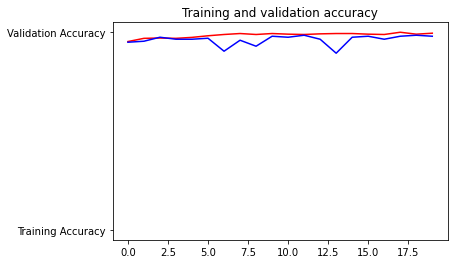

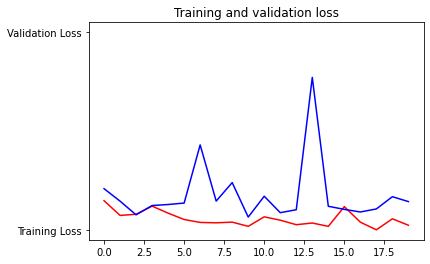

In [23]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')